In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# **Ans1**  
# the Traveling Salesperson Problem (TSP): find the shortest route for a salesperson who needs to visit customers at different locations and return to the starting point.  
# The number of vehicles in the problem is 1 .  


In [ ]:
distance= np.loadtxt(open('TSP11.csv', "rb"),delimiter=",")

distance

array([[  0.,  29.,  20.,  21.,  16.,  31., 100.,  12.,   4.,  31.,  18.],
       [ 29.,   0.,  15.,  29.,  28.,  40.,  72.,  21.,  29.,  41.,  12.],
       [ 20.,  15.,   0.,  15.,  14.,  25.,  81.,   9.,  23.,  27.,  13.],
       [ 21.,  29.,  15.,   0.,   4.,  12.,  92.,  12.,  25.,  13.,  25.],
       [ 16.,  28.,  14.,   4.,   0.,  16.,  94.,   9.,  20.,  16.,  22.],
       [ 31.,  40.,  25.,  12.,  16.,   0.,  95.,  24.,  36.,   3.,  37.],
       [100.,  72.,  81.,  92.,  94.,  95.,   0.,  90., 101.,  99.,  84.],
       [ 12.,  21.,   9.,  12.,   9.,  24.,  90.,   0.,  15.,  25.,  13.],
       [  4.,  29.,  23.,  25.,  20.,  36., 101.,  15.,   0.,  35.,  18.],
       [ 31.,  41.,  27.,  13.,  16.,   3.,  99.,  25.,  35.,   0.,  38.],
       [ 18.,  12.,  13.,  25.,  22.,  37.,  84.,  13.,  18.,  38.,   0.]])

In [ ]:
def random_intial_solution(N):
  To=np.arange(0,N,1)
  np.random.shuffle(To)
  return To

# **Ans4**
# Cost

In [ ]:
def cost(T):
  cost=[[0]]
  for i in range(10):
    cost=cost+distance[T[i],T[i+1]]
  cost=cost +distance[T[i+1],T[0]]
  return cost

# **Ans5**
# Neighbours

In [ ]:
def neighbours(R):
  T_neighb=[]
  n=len(R)-1
  # R=list(np.arange(0,11,1))
  T=list(R)
  for i in range(n):
    a=T[i+1]
    T[i+1]=T[i]
    T[i]=a
    T_neighb.append(T)
    T=list(R)
    a=[]
  a=T[n]
  T[n]=T[n]
  T[n]=a
  T_neighb.append(T)
  j=np.random.randint(0,len(R))
  return  T_neighb[j]

# **Ans6**

In [ ]:
def accept_prob(cost_N,cost_C,Tk):
  diff=np.array(cost_N)-np.array(cost_C)
  mac=np.exp((-diff)/Tk)
  R=np.random.rand()
  if R<mac:
    return cost_N
  return cost_C


# **1**
# **Two things can happen here:**

# 1-  If performance Increases in the new set then the new feature set is Accepted.
# 2-  If the performance of the new feature set has worse performance, then the Acceptance Probability (otherwise called metropolis acceptance criterion) is calculated.  

# Once the acceptance probability is calculated,  
#  generate a random number between   0 and 1 :

# 1- If the Random Number > Acceptance Probability then the new feature set is Rejected and the previous feature set will be continued to be used.
# 2- If the Random Number < Acceptance Probability then the new feature set is Accepted.

# **The impact of randomness by this process helps simulated annealing to not get stuck at local optimums in search of a global optimum.**  




# **2**  


# When the temperature is high the chances of worse-performing features getting accepted is high and as the no. of iterations goes up, temperature decreases, and that in turn decreases the chances of worse-performing features getting accepted.

In [ ]:
def best_solution(To,max_itr,alp,T):
  k=0
  R=To
  all_cost=[]
  Tk=T
  cost_N=[]
  best=[]
  cost_To1=[]
  cost_To=cost(R)
  while k<max_itr:
    N=neighbours(R)
    # R=np.zeros(11)
    # print(n)
    Tk=alp*Tk
    cost_N=cost(N)
    # print(min(cost_N))
    # print(cost_N,'l')
    if cost_N<cost_To:
      cost_To=cost_N
      R=N
    else :
      cost_To=accept_prob(cost_N,cost_To,Tk)
      R=N
    best.append(R)
    all_cost.append(cost_To)
    k=k+1
    # best.append(R)
    # all_cost.append(cost_To)
  print('alpha is',alp)
  print('optimal distance for TSP problem',min(all_cost))
  print('optimal route for TSP problem',best[all_cost.index(min(all_cost))])
  return min(all_cost),best[all_cost.index(min(all_cost))], best,np.array(all_cost)


In [ ]:
To= random_intial_solution(11)
max_itr=20000
alp=0.8
T=1
optimal=best_solution(To,max_itr,alp,T)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


alpha is 0.8
optimal distance for TSP problem [[265.]]
optimal route for TSP problem [4, 0, 8, 7, 2, 10, 1, 6, 3, 9, 5]


# **Ans8**
# **For diffrent values of Alpha**

In [ ]:
alp=np.array([0.8,0.84,0.88,0.92,0.98])
cost_value=[]
T=1
max_itr=10000
for i in range(len(alp)):
  To= random_intial_solution(11)
  optimal=best_solution(To,max_itr,alp[i],T)
  cost_value.append(optimal[3])





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


alpha is 0.8
optimal distance for TSP problem [[263.]]
optimal route for TSP problem [0, 8, 7, 10, 1, 6, 2, 4, 9, 5, 3]
alpha is 0.84
optimal distance for TSP problem [[262.]]
optimal route for TSP problem [9, 5, 4, 7, 2, 6, 1, 10, 0, 8, 3]
alpha is 0.88
optimal distance for TSP problem [[274.]]
optimal route for TSP problem [6, 7, 4, 3, 9, 5, 0, 8, 2, 10, 1]
alpha is 0.92
optimal distance for TSP problem [[275.]]
optimal route for TSP problem [10, 1, 6, 4, 3, 9, 5, 2, 8, 0, 7]
alpha is 0.98
optimal distance for TSP problem [[255.]]
optimal route for TSP problem [7, 3, 5, 9, 4, 0, 8, 10, 1, 6, 2]


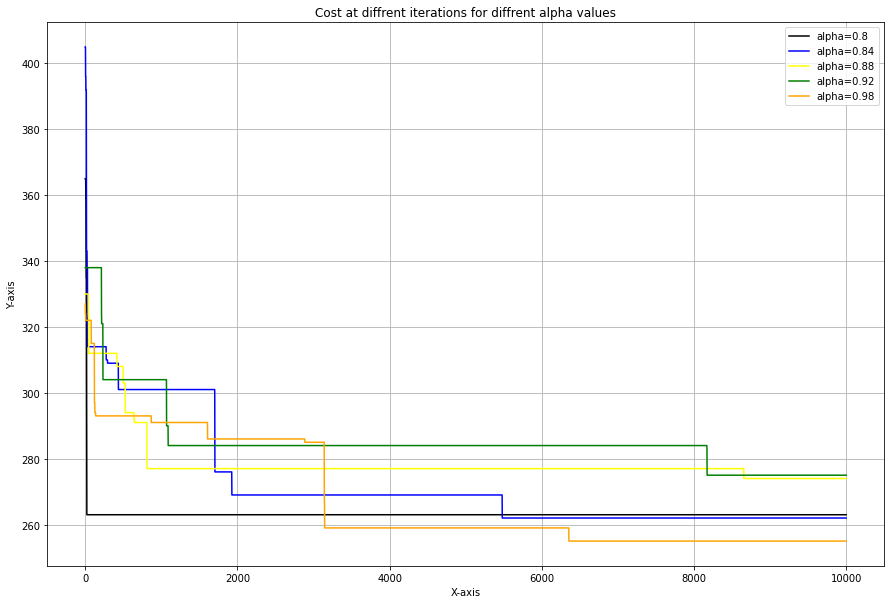

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(cost_value[0].reshape(len(cost_value[0]),1),color='black',label='alpha=0.8')
plt.plot(cost_value[1].reshape(len(cost_value[1]),1),color='blue',label='alpha=0.84')
plt.plot(cost_value[2].reshape(len(cost_value[2]),1),color='yellow',label='alpha=0.88')
plt.plot(cost_value[3].reshape(len(cost_value[3]),1),color='green',label='alpha=0.92')
plt.plot(cost_value[4].reshape(len(cost_value[4]),1),color='orange',label='alpha=0.98')
plt.grid()
plt.title(r'Cost at diffrent iterations for diffrent alpha values')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

# As we observe that the cost function is decreasing and  cost value decreases suddenly and after some iteration cost value become constant.  
# We observe that as alpha value increases convergence rate dicreases. hence more value of alpha take more time to give constant value of cost

# **For diffrent values of To**

In [ ]:
T=np.array([1.5,2,3,5,10])
cost_value=[]
max_itr=10000
alp=0.8
for i in range(len(T)):
  To= random_intial_solution(11)
  optimal=best_solution(To,max_itr,alp,T[i])
  print('To is',T[i])
  cost_value.append(optimal[3])





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


alpha is 0.8
optimal distance for TSP problem [[275.]]
optimal route for TSP problem [2, 0, 8, 10, 6, 1, 7, 4, 5, 9, 3]
To is 1.5
alpha is 0.8
optimal distance for TSP problem [[262.]]
optimal route for TSP problem [10, 1, 6, 2, 7, 4, 5, 9, 3, 8, 0]
To is 2.0
alpha is 0.8
optimal distance for TSP problem [[280.]]
optimal route for TSP problem [6, 2, 4, 5, 9, 3, 7, 0, 8, 1, 10]
To is 3.0
alpha is 0.8
optimal distance for TSP problem [[260.]]
optimal route for TSP problem [7, 3, 9, 5, 4, 2, 6, 1, 10, 0, 8]
To is 5.0
alpha is 0.8
optimal distance for TSP problem [[278.]]
optimal route for TSP problem [1, 2, 4, 7, 3, 5, 9, 8, 0, 10, 6]
To is 10.0


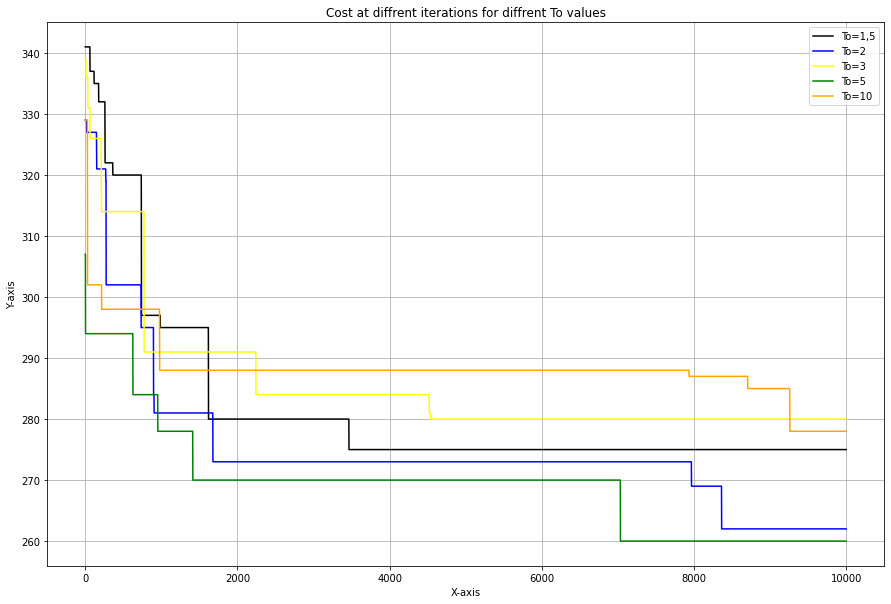

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(cost_value[0].reshape(len(cost_value[0]),1),color='black',label='To=1,5')
plt.plot(cost_value[1].reshape(len(cost_value[1]),1),color='blue',label='To=2')
plt.plot(cost_value[2].reshape(len(cost_value[2]),1),color='yellow',label='To=3')
plt.plot(cost_value[3].reshape(len(cost_value[3]),1),color='green',label='To=5')
plt.plot(cost_value[4].reshape(len(cost_value[4]),1),color='orange',label='To=10')
plt.grid()
plt.title(r'Cost at diffrent iterations for diffrent To values')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

# We observe that as To value increases convergence rate dicreases. hence more value of To take more time to give constant value of cost.

# **Ans9**
# **We choose Another cooling schedule**  

# Temperature = initial_Temperature /(1+ log(Iteration_number + 1))  
# Temperature T of the system must be decreased logarithmically according to the equation

In [ ]:
from logging import log
def best_solution_schedule(To,max_itr):
  k=0
  R=To
  all_cost=[]
  Tk=1
  cost_N=[]
  best=[]
  cost_To=cost(R)
  while k<max_itr:
    N=neighbours(R)
    # R=np.zeros(11)
    # print(n)
    Tk=Tk/(1+np.log(k+1))
    cost_N=cost(N)
    # print(min(cost_N))
    # print(cost_N,'l')
    if cost_N<cost_To:
      cost_To=cost_N
      R=N
      best.append(R)
      all_cost.append(cost_To)
    else :
      cost_To=accept_prob(cost_N,cost_To,Tk)
      R=N
    k=k+1
    # best.append(R)
    # all_cost.append(cost_To)
  print('optimal distance for TSP problem',min(all_cost))
  print('optimal route for TSP problem',best[all_cost.index(min(all_cost))])
  return min(all_cost),best[all_cost.index(min(all_cost))], best,np.array(all_cost)


In [ ]:
max_itr=30000
To= random_intial_solution(11)
optimal=best_solution_schedule(To,max_itr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


optimal distance for TSP problem [[257.]]
optimal route for TSP problem [1, 6, 2, 4, 3, 5, 9, 7, 0, 8, 10]


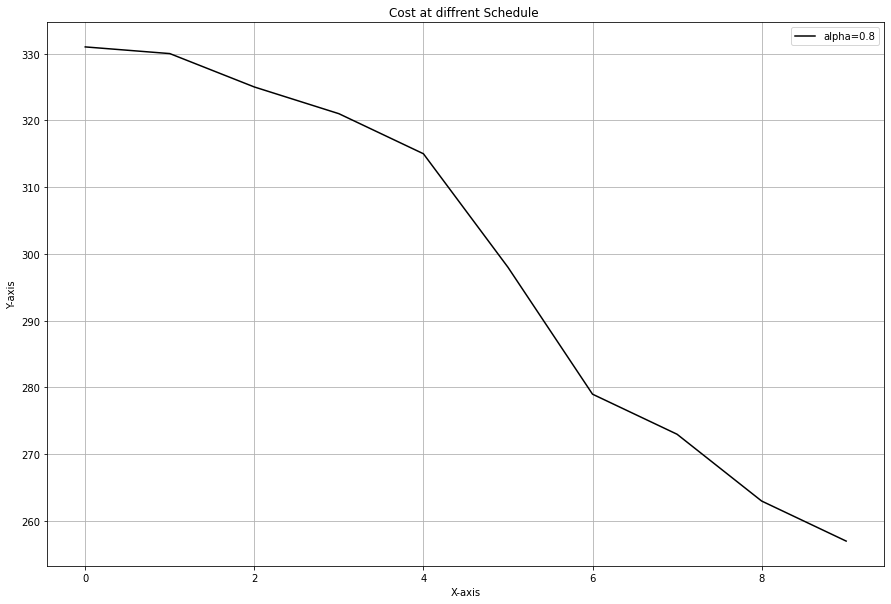

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(optimal[3].reshape(len(optimal[3]),1),color='black',label='alpha=0.8')
plt.grid()
plt.title(r'Cost at diffrent Schedule ')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

# By new cooling schedule the graph become more smooth means algorithm does not changes cost value suddenly and temperature decreases slowly. hence it converges smoothly. 

# **Ans10**
# **Solving for TSP48**

In [ ]:
distance_48= np.loadtxt(open('TSP48.csv', "rb"),delimiter=",")

In [ ]:
def cost_48(T):
  cost=[[0]]
  for i in range(len(T)-1):
    cost=cost+distance_48[T[i],T[i+1]]
  cost=cost +distance_48[T[i+1],T[0]]
  return cost

In [ ]:
def best_solution_48(To,max_itr,alp):
  k=0
  R=To
  all_cost=[]
  Tk=1
  cost_N=[]
  best=[]
  cost_To=cost_48(R)
  while k<max_itr:
    N=neighbours(R)
    # R=np.zeros(11)
    # print(n)
    Tk=alp*Tk
    cost_N=cost_48(N)
    # print(min(cost_N))
    # print(cost_N,'l')
    if cost_N<cost_To:
      cost_To=cost_N
      R=N
      best.append(R)
      all_cost.append(cost_To)
    else :
      cost_To=accept_prob(cost_N,cost_To,Tk)
      R=N
    k=k+1
    # best.append(R)
    # all_cost.append(cost_To)
  print('alpha is',alp)
  print('optimal distance for TSP problem',min(all_cost))
  print('optimal route for TSP problem',best[all_cost.index(min(all_cost))])
  return min(all_cost),best[all_cost.index(min(all_cost))], best,np.array(all_cost)


In [ ]:
To= random_intial_solution(48)
max_itr=50000
alp=0.8
optimal=best_solution_48(To,max_itr,alp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


alpha is 0.8
optimal distance for TSP problem [[119281.]]
optimal route for TSP problem [18, 34, 4, 24, 16, 30, 11, 13, 26, 21, 2, 45, 31, 12, 28, 25, 15, 44, 3, 42, 27, 32, 19, 20, 38, 23, 9, 1, 40, 10, 6, 8, 39, 47, 7, 36, 5, 37, 0, 14, 35, 22, 33, 41, 46, 17, 29, 43]


# **For diffrent values of Alpha**

In [ ]:
alp=np.array([0.8,0.84,0.88,0.92,0.98])
d=len(distance_48)
cost_value=[]
max_itr=50000
T=1
for i in range(len(alp)):
  To= random_intial_solution(d)
  optimal=best_solution_48(To,max_itr,alp[i])
  cost_value.append(optimal[3])





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


alpha is 0.8
optimal distance for TSP problem [[119059.]]
optimal route for TSP problem [22, 8, 33, 13, 20, 21, 2, 19, 38, 32, 5, 6, 24, 11, 47, 41, 1, 3, 4, 12, 46, 15, 26, 35, 43, 42, 39, 9, 23, 0, 14, 17, 16, 10, 45, 27, 29, 31, 36, 18, 44, 34, 7, 37, 40, 30, 25, 28]
alpha is 0.84
optimal distance for TSP problem [[110840.]]
optimal route for TSP problem [40, 28, 13, 19, 8, 3, 44, 23, 31, 36, 45, 0, 37, 27, 32, 16, 18, 6, 12, 41, 2, 35, 17, 14, 43, 30, 22, 10, 29, 7, 46, 20, 26, 42, 25, 1, 39, 47, 5, 21, 15, 24, 4, 34, 9, 38, 11, 33]
alpha is 0.88
optimal distance for TSP problem [[112113.]]
optimal route for TSP problem [18, 33, 31, 19, 1, 12, 39, 7, 22, 15, 44, 34, 6, 35, 14, 11, 13, 36, 27, 29, 17, 24, 4, 32, 5, 26, 45, 8, 21, 2, 10, 47, 43, 41, 3, 25, 9, 40, 20, 38, 23, 28, 46, 30, 16, 0, 37, 42]
alpha is 0.92
optimal distance for TSP problem [[120324.]]
optimal route for TSP problem [5, 27, 37, 25, 44, 34, 1, 26, 6, 35, 46, 23, 22, 9, 3, 14, 24, 8, 45, 19, 21, 33, 13, 38, 10, 4

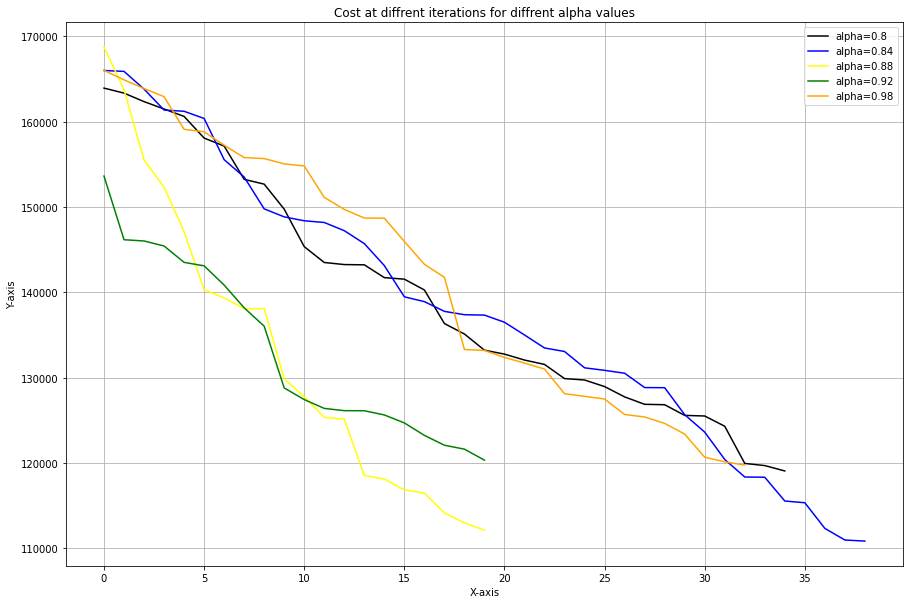

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(cost_value[0].reshape(len(cost_value[0]),1),color='black',label='alpha=0.8')
plt.plot(cost_value[1].reshape(len(cost_value[1]),1),color='blue',label='alpha=0.84')
plt.plot(cost_value[2].reshape(len(cost_value[2]),1),color='yellow',label='alpha=0.88')
plt.plot(cost_value[3].reshape(len(cost_value[3]),1),color='green',label='alpha=0.92')
plt.plot(cost_value[4].reshape(len(cost_value[4]),1),color='orange',label='alpha=0.98')
plt.grid()
plt.title(r'Cost at diffrent iterations for diffrent alpha values')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()


# **We choose Another cooling schedule for TSP48**  

# Temperature = initial_Temperature /(1+ log(Iteration_number + 1)

In [ ]:
def best_solution_shedule_48(To,max_itr):
  k=0
  R=To
  all_cost=[]
  Tk=1
  cost_N=[]
  best=[]
  cost_To=cost_48(R)
  while k<max_itr:
    N=neighbours(R)
    # R=np.zeros(11)
    # print(n)
    Tk=Tk/(1+np.log(k+1))
    cost_N=cost_48(N)
    # print(min(cost_N))
    # print(cost_N,'l')
    if cost_N<cost_To:
      cost_To=cost_N
      R=N
      best.append(R)
      all_cost.append(cost_To)
    else :
      cost_To=accept_prob(cost_N,cost_To,Tk)
      R=N
    k=k+1
    # best.append(R)
    # all_cost.append(cost_To)
  print('optimal distance for TSP problem',min(all_cost))
  print('optimal route for TSP problem',best[all_cost.index(min(all_cost))])
  return min(all_cost),best[all_cost.index(min(all_cost))], best,np.array(all_cost)


In [ ]:
d=len(distance_48)
max_itr=30000
To= random_intial_solution(d)
optimal=best_solution_shedule_48(To,max_itr)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


optimal distance for TSP problem [[120597.]]
optimal route for TSP problem [35, 16, 17, 33, 38, 24, 31, 15, 0, 2, 32, 26, 11, 4, 10, 39, 43, 19, 34, 23, 18, 13, 3, 1, 28, 22, 8, 46, 29, 14, 6, 5, 36, 42, 37, 44, 47, 45, 30, 27, 12, 25, 7, 21, 40, 9, 41, 20]


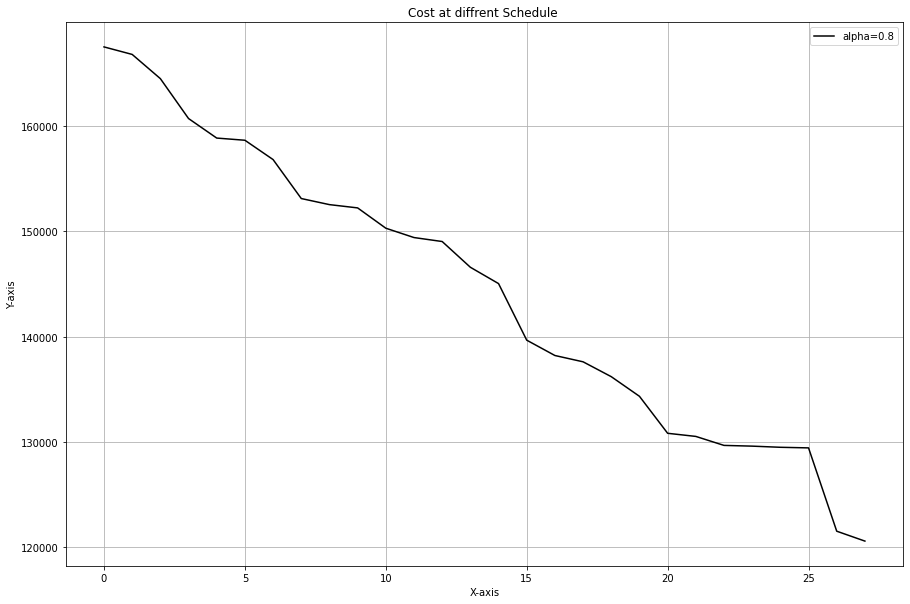

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(optimal[3].reshape(len(optimal[3]),1),color='black',label='alpha=0.8')
plt.grid()
plt.title(r'Cost at diffrent Schedule ')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

# Temperature T of the algorithm  decreased logarithmically according to the plot


# TSP: Traveling Salesman Problem By MILP



Luego, el problema a optimizar es el siguiente:
$$\begin{align}
\min \quad & \sum_{e\in E} d_e x_e \\
\text{s.t.} \quad & \sum_{e=(i,j)\in E} x_e = 1  &&\forall i \in C \\
 & \sum_{e=(i,j)\in E} x_e = 1 && \forall j \in C  \\
 & u_i + 1 \leq u_j + M(1-x_{ij})&& \forall (i,j)\in E : j\neq 0 \\
 & x_e \in \{0,1\} && \forall (i,j)\in E\\
 & u_i \geq 0 && \forall i \in C
\end{align}$$

In [ ]:
!pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import gurobipy as gu
from gurobipy import Model, GRB, quicksum
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_txtfile= np.loadtxt('/content/TSP11.csv', delimiter=',')

In [ ]:
n = 10
ciudades = [i for i in range(n)]

In [ ]:
arcos = [(i, j) for i in ciudades for j in ciudades if i != j]

In [ ]:

distancia = {(i, j):data_txtfile[i,j] 
            for i, j in arcos}

In [ ]:
mdl = Model('TSP')

In [ ]:
x = mdl.addVars(arcos, vtype=GRB.BINARY, name='x')
u = mdl.addVars(ciudades, vtype=GRB.CONTINUOUS, name='u')

$$\min \sum_{e\in E} d_e x_e$$

In [ ]:
mdl.setObjective(quicksum(distancia[e] * x[e] for e in arcos), GRB.MINIMIZE)

$$\sum_{e=(i,j)\in E} x_e = 1 \quad \forall i \in C$$

In [ ]:
for c in ciudades:
    mdl.addConstr(quicksum(x[(i,j)] for i,j in arcos if i==c)==1, name='out_%d'%c)

$$\sum_{e=(i,j)\in E} x_e = 1 \quad \forall j \in C $$

In [ ]:
for c in ciudades:
    mdl.addConstr(quicksum(x[(i,j)] for i,j in arcos if j==c)==1, name='in_%d'%c)

$$u_i + 1 \leq u_j + M(1-x_{ij}) \quad \forall (i,j)\in E : j\neq 0$$

In [ ]:
for i, j in arcos:
    if j!=0:
        mdl.addConstr((x[(i, j)] == 1) >> (u[i] + 1 == u[j]), name='order_(%d,_%d)'%(i, j))

In [ ]:
tour = [0]
while len(tour) < n:
    k = tour[-1]
    new_dist = {(i, j): d for (i,j), d in distancia.items()
                if i==k and j not in tour}
    (i, j) = min(new_dist, key=new_dist.get)
    tour.append(j)
tour

[0, 8, 7, 2, 4, 3, 5, 9, 1, 6]

In [ ]:
for g in range(n):
    i = tour[g - 1]
    j = tour[g]
    x[(i,j)].start = 1

In [ ]:
mdl.Params.timeLimit = 600
mdl.Params.MIPGap = 0.2
mdl.optimize()

Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.2
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 20 rows, 100 columns and 180 nonzeros
Model fingerprint: 0xf94768d3
Model has 81 general constraints
Variable types: 10 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]

User MIP start produced solution with objective 274 (0.02s)
Loaded user MIP start with objective 274

Presolve added 81 rows and 81 columns
Presolve time: 0.00s
Presolved: 101 rows, 181 columns, 387 nonzeros
Presolved model has 81 SOS constraint(s)
Variable types: 91 continuous, 90 integer (90 binary)

Root relaxation: objective 1.840000e+02, 12 iterations, 0.00 seconds (0.00 work units)

In [ ]:
x, u

({(0, 1): <gurobi.Var x[0,1] (value -0.0)>,
  (0, 2): <gurobi.Var x[0,2] (value -0.0)>,
  (0, 3): <gurobi.Var x[0,3] (value -0.0)>,
  (0, 4): <gurobi.Var x[0,4] (value -0.0)>,
  (0, 5): <gurobi.Var x[0,5] (value -0.0)>,
  (0, 6): <gurobi.Var x[0,6] (value -0.0)>,
  (0, 7): <gurobi.Var x[0,7] (value 0.0)>,
  (0, 8): <gurobi.Var x[0,8] (value 1.0)>,
  (0, 9): <gurobi.Var x[0,9] (value -0.0)>,
  (1, 0): <gurobi.Var x[1,0] (value -0.0)>,
  (1, 2): <gurobi.Var x[1,2] (value 0.0)>,
  (1, 3): <gurobi.Var x[1,3] (value -0.0)>,
  (1, 4): <gurobi.Var x[1,4] (value -0.0)>,
  (1, 5): <gurobi.Var x[1,5] (value -0.0)>,
  (1, 6): <gurobi.Var x[1,6] (value 1.0)>,
  (1, 7): <gurobi.Var x[1,7] (value -0.0)>,
  (1, 8): <gurobi.Var x[1,8] (value -0.0)>,
  (1, 9): <gurobi.Var x[1,9] (value -0.0)>,
  (2, 0): <gurobi.Var x[2,0] (value 0.0)>,
  (2, 1): <gurobi.Var x[2,1] (value -0.0)>,
  (2, 3): <gurobi.Var x[2,3] (value -0.0)>,
  (2, 4): <gurobi.Var x[2,4] (value -0.0)>,
  (2, 5): <gurobi.Var x[2,5] (value 1

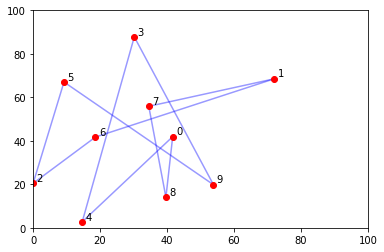

In [ ]:
arcos_activos = [e for e in arcos if x[e].x > 0.9]
for i,j in arcos_activos:
    plt.plot([coord_x[i],coord_x[j]],[coord_y[i],coord_y[j]],
              color='b', alpha=0.4, zorder=0)
plt.scatter(x=coord_x, y=coord_y, color='r', zorder=1)
for i in ciudades:
    plt.annotate(i,(coord_x[i]+1,coord_y[i]+1))
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()

In [3]:
OP_MILP=254
OP_SIMULATION=265
ERR_PERCENT=((OP_SIMULATION-OP_MILP)/OP_MILP)*100
ERR_PERCENT

4.330708661417323